In [124]:
## Importing Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neighbors import KNeighborsClassifier

In [125]:
##Reading file
df1 = pd.read_csv('C:/Users/TOTAGOUSER4/Documents/Totago Technologies/David/Data Science/Projects/DSN Expresso Churn Prediction/Train.csv')
df2 = pd.read_csv('C:/Users/TOTAGOUSER4/Documents/Totago Technologies/David/Data Science/Projects/DSN Expresso Churn Prediction/Test.csv')

In [126]:
##Checkpoint
data1 = df1.copy()
data2 = df2.copy()

In [127]:
##To display entire dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',  None)
df1.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [128]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

In [129]:
df1['FREQ_TOP_PACK'].unique()

array([ 35.,  22.,   3.,  nan,   7.,   2.,   4.,  11.,   1.,  29.,  17.,
         8.,  14.,   5.,  21.,   9.,  13.,  16.,  42.,   6.,  25.,  74.,
        15.,  56.,  32.,  81.,  24.,  12.,  50.,  20.,  19.,  10.,  65.,
        18.,  31.,  38.,  59.,  79.,  28.,  23.,  39.,  27., 129.,  30.,
        33.,  43.,  40.,  48.,  45.,  26.,  73.,  66.,  37.,  80.,  46.,
        60.,  55.,  49.,  36.,  52.,  68.,  34.,  84.,  86.,  92.,  76.,
        53.,  58.,  44.,  54.,  47., 117.,  75.,  57.,  41.,  98.,  93.,
        77.,  62.,  64.,  61., 104.,  51.,  87.,  69.,  63., 141., 188.,
       102., 127.,  71.,  91.,  89.,  78.,  67.,  90.,  83., 257., 130.,
        70.,  72., 103.,  85., 238.,  95.,  82., 114., 116., 112.,  96.,
       149., 108.,  97.,  94., 120., 262., 126., 145.,  88., 101., 134.,
       169., 253., 174., 105., 100., 118., 143., 106., 122., 139., 150.,
       125., 156., 160., 109., 110., 132., 128., 186., 113., 198., 629.,
       511., 243., 111., 121., 107., 146., 212., 13

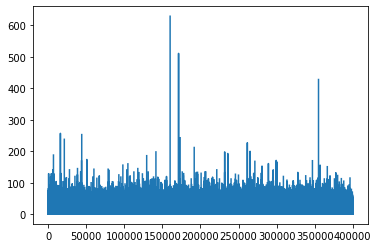

In [130]:
df1['FREQ_TOP_PACK'].plot()

In [131]:
## Fill null Tenure with mode (K>24)
df1['REGION'].fillna('Unknown', inplace=True)
df2['REGION'].fillna('Unknown', inplace=True)

In [132]:
##Fill null Montant with the mean.
df1['MONTANT'].fillna(np.mean(df1['MONTANT']), inplace=True)
df2['MONTANT'].fillna(np.mean(df2['MONTANT']), inplace=True)

In [133]:
##Fill null Frequency_Rech with the mean.
df1['FREQUENCE_RECH'].fillna(np.mean(df1['FREQUENCE_RECH']), inplace=True)
df2['FREQUENCE_RECH'].fillna(np.mean(df2['FREQUENCE_RECH']), inplace=True)

In [134]:
##Fill null REVENUE with the mean.
df1['REVENUE'].fillna(np.mean(df1['REVENUE']), inplace=True)
df2['REVENUE'].fillna(np.mean(df2['REVENUE']), inplace=True)

In [135]:
##Fill null ARPU_SEGMENT with the mean.
df1['ARPU_SEGMENT'].fillna(np.mean(df1['ARPU_SEGMENT']), inplace=True)
df2['ARPU_SEGMENT'].fillna(np.mean(df2['ARPU_SEGMENT']), inplace=True)

In [136]:
##Fill null FREQUENCE with the mean.
df1['FREQUENCE'].fillna(np.mean(df1['FREQUENCE']), inplace=True)
df2['FREQUENCE'].fillna(np.mean(df2['FREQUENCE']), inplace=True)

In [137]:
##Fill null DATA_VOLUME with the mean.
df1['DATA_VOLUME'].fillna(np.mean(df1['DATA_VOLUME']), inplace=True)
df2['DATA_VOLUME'].fillna(np.mean(df2['DATA_VOLUME']), inplace=True)

In [138]:
##Fill null ON_NET with the mean.
df1['ON_NET'].fillna(np.mean(df1['ON_NET']), inplace=True)
df2['ON_NET'].fillna(np.mean(df2['ON_NET']), inplace=True)

In [139]:
##Fill null ORANGE with the mean.
df1['ORANGE'].fillna(np.mean(df1['ORANGE']), inplace=True)
df2['ORANGE'].fillna(np.mean(df2['ORANGE']), inplace=True)

In [140]:
##Fill null TIGO with the mean.
df1['TIGO'].fillna(np.mean(df1['TIGO']), inplace=True)
df2['TIGO'].fillna(np.mean(df2['TIGO']), inplace=True)

In [141]:
 ##Fill null ZONE1 with the mean.
df1['ZONE1'].fillna(np.mean(df1['ZONE1']), inplace=True)
df2['ZONE1'].fillna(np.mean(df2['ZONE1']), inplace=True)

In [142]:
 ##Fill null ZONE2 with the mean.
df1['ZONE2'].fillna(np.mean(df1['ZONE2']), inplace=True)
df2['ZONE2'].fillna(np.mean(df2['ZONE2']), inplace=True)

In [143]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [144]:
#le.fit(df1['TOP_PACK'])
#le.fit(df2['TOP_PACK'])

In [145]:
 ##Fill null FREQ_TOP_PACK with the mean.
df1['FREQ_TOP_PACK'].fillna(np.mean(df1['FREQ_TOP_PACK']), inplace=True)
df2['FREQ_TOP_PACK'].fillna(np.mean(df2['FREQ_TOP_PACK']), inplace=True)

In [146]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          400000 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         400000 non-null  float64
 4   FREQUENCE_RECH  400000 non-null  float64
 5   REVENUE         400000 non-null  float64
 6   ARPU_SEGMENT    400000 non-null  float64
 7   FREQUENCE       400000 non-null  float64
 8   DATA_VOLUME     400000 non-null  float64
 9   ON_NET          400000 non-null  float64
 10  ORANGE          400000 non-null  float64
 11  TIGO            400000 non-null  float64
 12  ZONE1           400000 non-null  float64
 13  ZONE2           400000 non-null  float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

In [147]:
df1.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [148]:
y = df1[['CHURN']]
         
X1 = df1[['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'FREQ_TOP_PACK']]

X2 = df2[['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'FREQ_TOP_PACK']]

In [149]:
##Dummies
X1 = pd.get_dummies(X1)
X2 = pd.get_dummies(X2)

In [150]:
scaler = StandardScaler()
scaler.fit(X1)

X1 = scaler.transform(X1)
X2 = scaler.transform(X2)

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", StandardScaler()), ("model", LogisticRegression())])
#pipe = Pipeline([("scaler", StandardScaler()), ("model", RandomForestClassifier())])

In [158]:
pipe.fit(X1, y)

C:\Users\TOTAGOUSER4\anaconda3\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [159]:
y2 = pipe.predict_proba(X2)

In [160]:
y2

array([[0.33860812, 0.66139188],
       [0.53265592, 0.46734408],
       [0.81      , 0.19      ],
       ...,
       [0.96      , 0.04      ],
       [1.        , 0.        ],
       [0.89      , 0.11      ]])

In [161]:
pipe.score(X1, y)

0.919875

In [117]:
## Logistic Regression
Reg = LogisticRegression()

In [118]:
##Fitting the data
Reg.fit(X1, y)

C:\Users\TOTAGOUSER4\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
##Accuracy of model
Reg.score(X1, y)

0.8743175

In [120]:
y2 = Reg.predict(X2)

In [121]:
y3 = Reg.predict_proba(X2)
y3

array([[0.32188104, 0.67811896],
       [0.42440407, 0.57559593],
       [0.8318219 , 0.1681781 ],
       ...,
       [0.99175774, 0.00824226],
       [0.97918838, 0.02081162],
       [0.90986747, 0.09013253]])

In [156]:
##Saving the prediction
z = pd.read_csv('C:/Users/TOTAGOUSER4/Documents/Totago Technologies/David/Data Science/Projects/DSN Expresso Churn Prediction/sample_submission.csv')
z['CHURN'] = y2
z.to_csv('C:/Users/TOTAGOUSER4/Documents/Totago Technologies/David/Data Science/Projects/DSN Expresso Churn Prediction/my_prediction.csv', index = False)